In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from pdb import set_trace

In [6]:
def load_random_data():
    x = np.random.rand(500, 1)
    y = 4 * x + 3 + np.random.rand(500, 1)
    
    plt.scatter(x, y)
    plt.show()

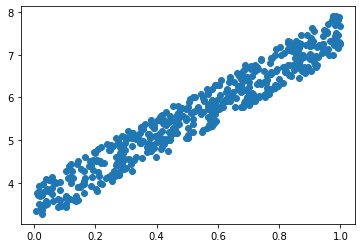

In [7]:
load_random_data()

In [2]:
def linear_regression(x, y):
    X_t = x.T
    X_y = X_t.dot(y) # x is a column vector so it needs to be transformed
    X_XT = X_t.dot(x)
    w = np.linalg.solve(X_XT, X_y) #(X_XT dot X_y)^-1
    return w

In [3]:
def model(x, w, b):
    y_hat = x.dot(w) + b
    return y_hat

In [4]:
def mean_square_error(y_hat, y):
    n = y.shape[0]
    mse = (1/(2 * n)) * np.sum(np.square(y_hat - y))
    return mse

In [5]:
def l2(w, y, alpha = 0.01):
    n = y.shape[0]
    wt_w = (w).dot(w.T) # (w^T)w
    reg = (1/(2 * n) * alpha) * wt_w # (alpha/2n) * ((w^T)w) 
    return reg

In [6]:
def regularized_mean_square_error(y, y_hat, reg):
    n = y.shape[0]
    mse = mean_square_error(y_hat, y)
    return mse + reg

In [7]:
#Train/Test Split performed by randomly taking inputs and their associated labels and assigning them to either a training group or a test group
#---------------------------------------------------#----------------#
#                                                   |                |
#                  Training set                     |   Testing Set  |
#                                                   |                |
#---------------------------------------------------#----------------#
#train_perc should be a value between 0 and 1, eg. train_perc 0.8
def random_train_test_split(dataset, train_perc = 0.8):
    perc_of_dataset = dataset.shape[1] * train_perc
    numpy.random.shuffle(dataset)

    train = dataset_arrx[:perc_of_dataset,:] 
    test = dataset_arr[perc_of_dataset:,:]

    return train, test

In [8]:
#Validation/Test Split performed by randomly taking inputs and their associated labels and assigning them to either a validation group or a test group
#---------------------------------------------------#----------------#
#                                                   |                |
#                  Training set                     |   Testing Set  |
#                                                   |                |
#---------------------------------------------------#----------------#
#                                                             V
#                                                |------------#---------#
#                                                |            |         |
#                                                | Validation | Testing |
#                                                |     Set    |   Set   |
#                                                |------------#---------#
#train_perc should be a value between 0 and 1, eg. train_perc 0.5 for a 50/50 split of the test set 
def random_test_validation_split(x, y, train_perc = 0.8):
    dataset_row_size, dataset_col_size = x.shape
    validation_set_size = int(dataset_row_size * train_perc)
    test_set_size = int(dataset_row_size - validation_set_size)

    #get random indices for both validation and test sets
    indices = np.random.permutation(x.shape[0])
    validation_p_index = indices[:validation_set_size]
    test_p_index = indices[test_set_size:]

    #validation and test labels
    validation_l = y[validation_p_index]
    test_l = y[test_p_index]

    #validation and test parameters 
    validation_p = x[validation_p_index]
    test_p = x[test_p_index]

    return validation_p, validation_l, test_p, test_l

In [9]:
#X is the input 
#y is the real result
#w is the weight 
#epsilon is the learning rate
#alpha is the regularized term
#reg_bool if you wish to use the regularized term
def gradient_descent(x, y, b, w, learning_rate, reg_bool):
    # batch_size x 2304
    X_t = x.T # 2304 x batch_size
    n = y.shape[0]
    y_hat = model(x, w, b)

    #taking derivative 
    # 2304 x 1 
    derivative_of_w = (1/n) * X_t.dot(y_hat - y)
    derivative_of_b = (1/n) * (y_hat - y)

    # if regularized term is wanted then add that to the derivative with respect to w
    if reg_bool == True:
        derivative_of_w += ((alpha/n) * w)

    #this is gradient descent
    w = w - (learning_rate * derivative_of_w)
    b = b - (learning_rate * derivative_of_b)

    return w, b

In [10]:
#ripped from https://stackoverflow.com/questions/4601373/better-way-to-shuffle-two-numpy-arrays-in-unison
def unison_shuffled_copies(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(b))
    return a[p], b[p]

In [11]:
def visualize_that_beh(history: dict):
    # summarize history for accuracy
    plt.plot(history["epoch"], history["cost"], 'g', label='loss over epoch')
    plt.title('cost to epoch ')
    plt.ylabel('cost')
    plt.xlabel('epoch')
    plt.show()
    # summarize history for loss
    plt.plot(history["epoch"], history["learning_rate"], 'b', label='learning rate over epoch')
    plt.title('learning rate to epoch')
    plt.xlabel('Epochs')
    plt.ylabel('Learning Rate')
    plt.show()

In [12]:
def batch_iterator(x, y, size_of_batch):
    assert (len(x) == len(y))
    p = np.random.permutation(x.shape[0])
    x_rand = x[p]
    y_rand = y[p]
    for i in np.arange(0, x.shape[0], size_of_batch):
        yield x_rand[i:i + size_of_batch], y_rand[i:i + size_of_batch]

In [13]:
def stochastic_gradient_descent(x, y, b, w, learning_rate: float, num_of_epochs: int, size_of_batch: int, size_of_dataset: int, reg_bool: bool = True):
    set_trace()
    past_cost = 1e1000
    current_cost = -1
    history = {
        "epoch": -1,
        "weight": -1,
        "bias": -1,
        "cost": -1,
        "batch_size": math.ceil(size_of_dataset/size_of_batch),
        "learning rate": -1
    }

    epochs_since_improved = 0

    for e in range(num_of_epochs - 1):
        shuffled_x, shuffled_y = unison_shuffled_copies(x, y)

        for mini_batch_x, mini_batch_y in batch_iterator(x, y, size_of_batch):
            y_hat = model(mini_batch_x, w, b)

            if reg_bool == True:
                reg = l2(w, mini_batch_y)
                current_cost = regularized_mean_square_error(mini_batch_y, y_hat, reg)
            else:
                current_cost = mean_square_error(y_hat, mini_batch_y)

            
            w, b = gradient_descent(mini_batch_x, mini_batch_y, b, w, learning_rate, reg_bool)

            print("MSE: ", current_cost)
            print("Past MSE: ", past_cost)

        if (past_cost < current_cost): # if past cost remains to be lower than current cost, increment counter
            epoch_since_improved += 1

            if epoch_since_improved >= 3:
                learning_rate /= 10 #learning rate decays if cost does not lower after 3 epochs 
                print("learning rate decayed")
                print("epochs since improved: ", epoch_since_improved)
                
        else: # if current cost is lower than past cost set the counter to zero and update the past cost value
            epoch_since_improved = 0 
            past_cost = current_cost
            print("current cost is lower")

        history["epoch"] += 1
        history["weight"] = w
        history["bias"] = b
        history["cost"] = current_cost
        history["learning_rate"] = learning_rate

    visualize_that_beh(history)
    
    return w, b

In [14]:
def find_lowest_loss(x, y, learning_rate, num_of_epochs, size_of_batch, reg_bool = True):
    size_of_dataset = len(y)
    l = np.expand_dims(a=y, axis=-1)
    w_shape = (x.shape[1], l.shape[1]) #2304 x 1
    w = np.random.rand(*w_shape) * np.sqrt(1/(x.shape[1] + l.shape[1])) #set intial w value based off Xavier intilization
    b = np.random.rand(l.shape[1]) #set initial bias value 
    reg = l2(w, y) # set regularized term
    w_new, b_new = stochastic_gradient_descent(x, y, b, w, learning_rate, num_of_epochs, size_of_batch, size_of_dataset, reg_bool)
    loss = train_valid_test(x, w, b, y, reg, reg_bool)

In [15]:
def train_valid_test(x, w, b, y, reg: float, reg_bool: bool = False):
    y_hat = model(x, w, b)
    if reg_bool:
        train_or_validation = regularized_mean_square_error(y, y_hat, reg)
        test = regularized_mean_square_error(y, y_hat, reg)
    else:
        train_or_validation = mean_square_error(y_hat, y)
        test = mean_square_error(y_hat, y)

    return train_or_validation, test

In [16]:
def load_data():
    #training set
    x_tr = np.reshape(np.load("age_regression_Xtr.npy"), (-1, 48*48))
    y_tr = np.load("age_regression_ytr.npy")

    #testing set
    x_te = np.reshape(np.load("age_regression_Xte.npy"), (-1, 48*48))
    y_te = np.load("age_regression_yte.npy")

    return x_tr, y_tr, x_te, y_te

In [17]:
#Function Arguments:
#mse_bool is the boolean value that determines if mse will be performed without or with regularization, default is True
#alpha is the value for regularization, if used, default is 0.0
#ttv_val is the value associated with the type of split wanted. A Train/Test Split is 0, and a train/validation/split is 1, No Split Needed is 2. Default is 2
#learning rate is the hyperparameter associated with the gradient descent
def train_age_regressor(num_of_epochs: int, size_of_batch: int, ttv_val: int = 2, the_set: int = 0, learning_rate: float = 0.1, reg_bool = False):
    # Load data
    x_tr, y_tr, x_te, y_te = load_data()

    if ttv_val == 0:
        print("I made this before I realized train/test split is already given to you")

    elif ttv_val == 1:
        x_val, y_val, x_te, y_te = random_test_validation_split(x_te, y_te, train_perc = 0.8)

    loss = 1000000000
    if the_set == 0: #training set
        loss = find_lowest_loss(x_tr, y_tr, learning_rate, num_of_epochs, size_of_batch, reg_bool)
    elif the_set == 1: #validation set
        loss = find_lowest_loss(x_val, y_val, learning_rate, num_of_epochs, size_of_batch, reg_bool)
    elif the_set == 2: #test set
        loss = find_lowest_loss(x_te, y_te, learning_rate, num_of_epochs, size_of_batch, reg_bool)
    else:
        print("you did something wrong bud")


    return loss

In [18]:
print(train_age_regressor(num_of_epochs=300, size_of_batch=100, ttv_val=1, the_set=0, learning_rate=0.001, reg_bool=False))

> <ipython-input-13-419320dd4a20>(3)stochastic_gradient_descent()
      1 def stochastic_gradient_descent(x, y, b, w, learning_rate: float, num_of_epochs: int, size_of_batch: int, size_of_dataset: int, reg_bool: bool = True):
      2     set_trace()
----> 3     past_cost = 1e1000
      4     current_cost = -1
      5     history = {

> <ipython-input-13-419320dd4a20>(4)stochastic_gradient_descent()
      2     set_trace()
      3     past_cost = 1e1000
----> 4     current_cost = -1
      5     history = {
      6         "epoch": -1,

> <ipython-input-13-419320dd4a20>(6)stochastic_gradient_descent()
      4     current_cost = -1
      5     history = {
----> 6         "epoch": -1,
      7         "weight": -1,
      8         "bias": -1,

> <ipython-input-13-419320dd4a20>(7)stochastic_gradient_descent()
      5     history = {
      6         "epoch": -1,
----> 7         "weight": -1,
      8         "bias": -1,
      9         "cost": -1,

> <ipython-input-13-419320dd4a20>(8)stochasti

BdbQuit: 